# Problem 1

## Problem Description
In this problem you will create your own neural network to fit a function with two input features $x_0$ and $x_1$, and predict the output, $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an MSE for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model MSE
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [28]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch import optim, nn

def dataGen():
    # Set random seed so generated random numbers are always the same
    gen = np.random.RandomState(0)
    # Generate x0 and x1
    x = 2*(gen.rand(200,2)-0.5)
    # Generate y with x0^2 - 0.2*x1^4 + x0*x1 + noise
    y = x[:,0]**2 - 0.2*x[:,1]**4 + x[:,0]*x[:,1] + 0.4*(gen.rand(len(x))-0.5)
    
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 25
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]),max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]),max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = model(Xgrid).reshape(n,n)
    # 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot data
    ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
    # Plot model
    ax.plot_surface(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(), color = 'gray', alpha = 0.25)
    ax.plot_wireframe(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(),color = 'black', alpha = 0.25)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 3D scatter plot.

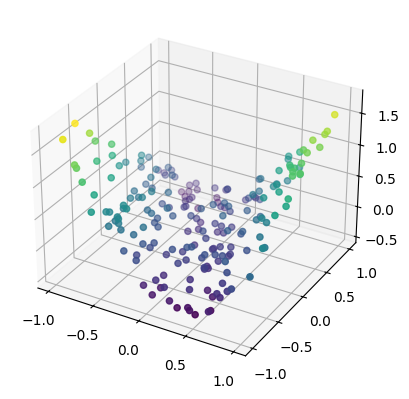

In [69]:
# YOUR CODE GOES HERE
x,y = dataGen()

n = 25


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
plt.show()

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An MSE smaller than 0.02 is reasonable. 

In [49]:
import torch
from torch import nn
import torch.nn.functional as F
    
class Net_2_layer(nn.Module):
    def __init__(self, N_hidden, N_in=2, N_out=1, activation=F.relu):
        super().__init__()
        # Define layers with correct input and output dimensions
        self.lin1 = nn.Linear(N_in, N_hidden)   # Input layer to first hidden layer
        self.lin2 = nn.Linear(N_hidden, N_hidden) # First hidden layer to second hidden layer
        self.lin3 = nn.Linear(N_hidden, N_out)  # Second hidden layer to output layer
        self.act = activation

    def forward(self, x):
        x = self.lin1(x)
        x = self.act(x)  # Activation of first hidden layer
        x = self.lin2(x)
        x = self.act(x)  # Activation at second hidden layer
        x = self.lin3(x) # (No activation at last layer)
        return x

Epoch 0 of 500... 	Average loss: 0.33496445417404175
Epoch 20 of 500... 	Average loss: 0.23309208452701569
Epoch 40 of 500... 	Average loss: 0.2218979448080063
Epoch 60 of 500... 	Average loss: 0.212642103433609
Epoch 80 of 500... 	Average loss: 0.20207147300243378
Epoch 100 of 500... 	Average loss: 0.18865519762039185
Epoch 120 of 500... 	Average loss: 0.1707312911748886
Epoch 140 of 500... 	Average loss: 0.14725624024868011
Epoch 160 of 500... 	Average loss: 0.1190943643450737
Epoch 180 of 500... 	Average loss: 0.09004058688879013
Epoch 200 of 500... 	Average loss: 0.06517359614372253
Epoch 220 of 500... 	Average loss: 0.046358294785022736
Epoch 240 of 500... 	Average loss: 0.032748691737651825
Epoch 260 of 500... 	Average loss: 0.02421431988477707
Epoch 280 of 500... 	Average loss: 0.02004747837781906
Epoch 300 of 500... 	Average loss: 0.018377097323536873
Epoch 320 of 500... 	Average loss: 0.01762426644563675
Epoch 340 of 500... 	Average loss: 0.01713530160486698
Epoch 360 of 500..

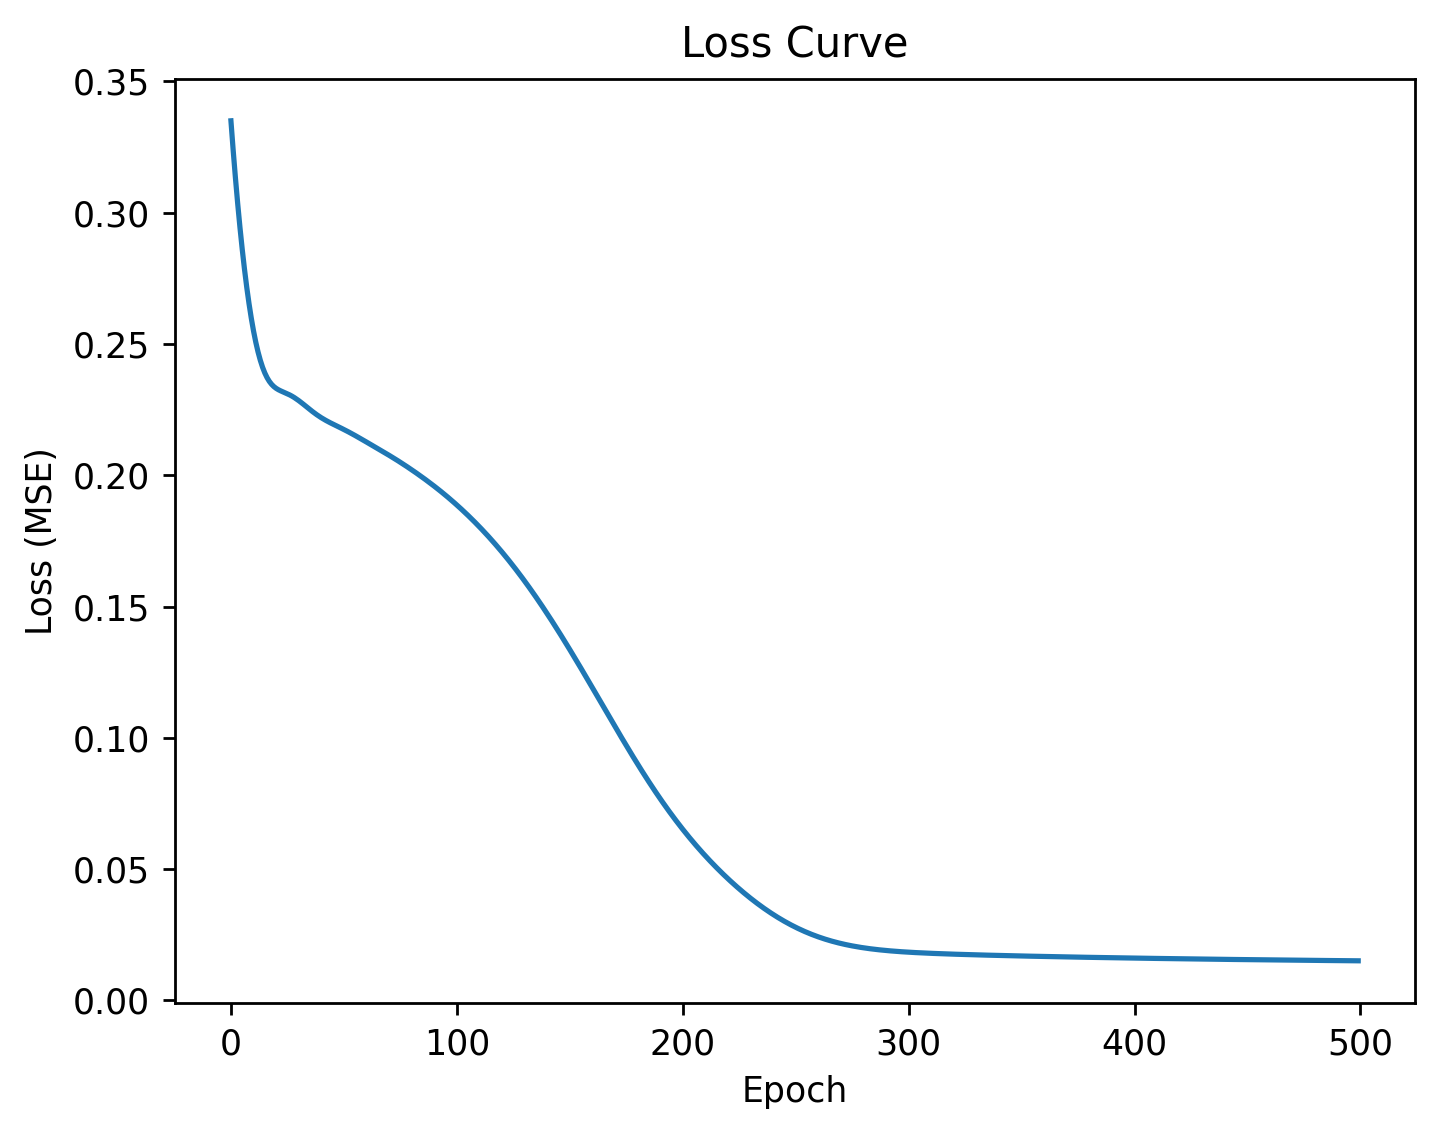

: 

In [71]:
x = torch.Tensor(x)
y = torch.Tensor(y)

model = Net_2_layer(N_hidden = 20, activation = F.tanh)
loss_curve = []

lr = 0.003
epochs = 500
loss_fcn = F.mse_loss

opt = optim.Adam(params = model.parameters(), lr=lr)


for epoch in range(epochs):
    out = model(x) 
    loss = loss_fcn(out,y.view(-1, 1))

    loss_curve.append(loss.item())
    
    if epoch % int(epochs / 25) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()}")

    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

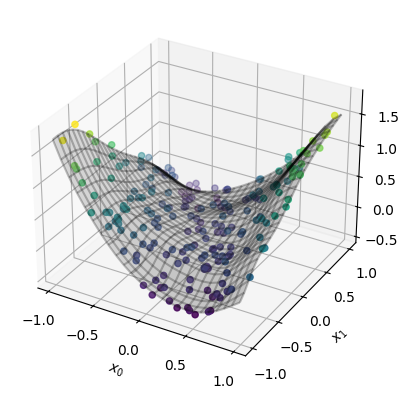

In [61]:
# YOUR CODE GOES HERE

visualizeModel(model)


## Discussion
Report the MSE of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

*YOUR ANSWER GOES HERE*

The structure of the model is a neural network with 2 hidden layers, with 20 percetrons in each layer. I chose tanh to be the activation function, as from previous experience this model converge quickly and provide great accuracy. The loss function chosen was MSE over MAE, because MSE penalize more for larger deviations. The optimizer used was Adaptive Moment Estimation for it's fast convergence. 

I chose to use a learning rate of 0.001 and epoch of 1500 as I feel this is a good balance between computation speed and accuracy. With lower learning rate and higher epochs the model tends to overfit and takes a long time to compute. On the opposite, higher learning rate and low epochs doesn't meet the accuracy requirement.
